# Import Libraries

In [1]:
!pip install pytesseract
# !pip install protobuf==3.20.2 --user
!pip install paddlepaddle --user
!pip install paddleocr --user

  Using cached paddleocr-2.9.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached shapely-2.0.6-cp38-cp38-win_amd64.whl.metadata (7.2 kB)
  Using cached scikit_image-0.21.0-cp38-cp38-win_amd64.whl.metadata (14 kB)
  Using cached imgaug-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached opencv_contrib_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached python_docx-1.1.2-py3-none-any.whl.metadata (2.0 kB)
  Using cached albumentations-1.4.10-py3-none-any.whl.metadata (38 kB)
  Using cached albucore-0.0.13-py3-none-any.whl.metadata (3.1 kB)
  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached pydantic-2.10.5-py3-none-any.whl.metadata (30 kB)
  Using cached imageio-2.35.1-py3-none-any.whl.metadata (4.9 kB)
  Using cached tifffile-2023.7.10-py3-none-any.whl.metadata (31 kB)
  Using cached PyWavelets-1.4.1-cp38-cp38-win_amd64.whl.metadata (1.9 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\silwa\\AppData\\Roaming\\Python\\Python38\\site-packages\\skimage\\color\\tests\\test_colorlabel.py'
Check the permissions.



In [4]:
# import pytesseract
# from pytesseract import Output
import cv2
import os
import matplotlib.pyplot as plt

from paddleocr import PaddleOCR

ModuleNotFoundError: No module named 'paddleocr'

In [12]:
pytesseract.pytesseract.tesseract_cmd = r'C://Users//silwa//OneDrive//Documents//Downloads//1. CV//OCR Basics//Tesseract-OCR'

os.environ["TESSDATA_PREFIX"] =  "C://Users//silwa//OneDrive//Documents//Downloads//1. CV//OCR Basics//Tesseract-OCR"
custom_config = r' -c preserve_interword_spaces=1'

# Configs
## Page segmentation modes:

    Orientation and script detection (OSD) only.

    Automatic page segmentation with OSD.

    Automatic page segmentation, but no OSD, or OCR. (not implemented)

    Fully automatic page segmentation, but no OSD. (Default)

    Assume a single column of text of variable sizes.

    Assume a single uniform block of vertically aligned text.

    Assume a single uniform block of text.

    Treat the image as a single text line.

    Treat the image as a single word.

    Treat the image as a single word in a circle.

    Treat the image as a single character.

    Sparse text. Find as much text as possible in no particular order.

    Sparse text with OSD.

    Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

## OCR Engine modes:

    Legacy engine only.

    Neural nets LSTM engine only.

    Legacy + LSTM engines.

    Default, based on what is available.

In [38]:
image = cv2.imread("data/nep_eng.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

### With Thresh

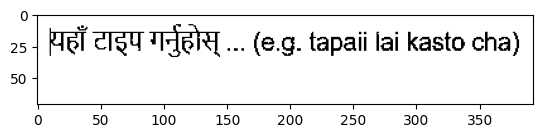

In [39]:
gray_thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
plt.imshow(gray_thresh,cmap="gray");

### With Blur

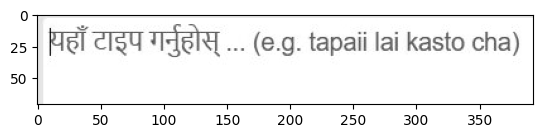

In [40]:
gray_blur = cv2.medianBlur(gray, 1)
plt.imshow(gray_blur,cmap="gray");

### Image to text

In [48]:
text_thresh = pytesseract.image_to_string(gray_thresh,lang = 'nep+eng', config = custom_config)

In [49]:
# text_blur   = pytesseract.image_to_data(gray_blur,lang = 'eng', config = custom_config,output_type=Output.DICT)['text']
text_blur = pytesseract.image_to_string(gray_blur,lang = 'nep+eng', config = custom_config)

In [50]:
print(text_thresh)

पहाँ टाइप गर्नुहोस्‌ .. (8.9. tapaii lai kasto cha)



In [51]:
print(text_blur)

हौँ टाइप गर्नुहोस्‌ .. (8.9. tapaii lai kasto cha)



# Using PaddleOCR

In [57]:
img = cv2.imread('data/nepali_test.jpg')

In [58]:
ocr = PaddleOCR(use_angle_cls=True, lang='ne')

[2024/09/15 08:52:49] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\Ghost/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\Ghost/.paddleocr/whl\\det\\ml\\Multilingual_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model

In [59]:
result = ocr.ocr(img, cls=True)
# print(result)
text = '\n'.join([word[1][0] for line in result for word in line])

[2024/09/15 08:54:23] ppocr DEBUG: dt_boxes num : 49, elapsed : 0.6965172290802002
[2024/09/15 08:54:24] ppocr DEBUG: cls num  : 49, elapsed : 0.28501319885253906
[2024/09/15 08:54:26] ppocr DEBUG: rec_res num  : 49, elapsed : 2.207000494003296


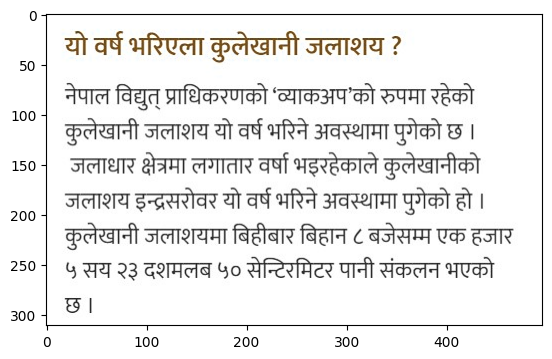

In [60]:
plt.imshow(img)

In [61]:
print(text)

b h
भिरएला
Phe
वधुत्
lo5/
I, hil,
Ihe
रहेको
भिरने
Hl6blf
lch.
जलाधार
देऋमा
HPIIcP
वषि
भइरहेकाले
इनदसरोवर
I
/b
भिरने
Hlhrble
Hhlap
िबहीबार
िबहान
बजेसमम
एक
हजार
सयं
२३
PHl६?
५०
सेिटरिमटर
Fh
संकलन
भएको
I ३


# Test on Rotation

In [62]:
import numpy as np

In [63]:
def rotate_image_with_padding(image, angle):
    # Get image dimensions
    height, width = image.shape[:2]
    # Calculate the rotation matrix
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
    # Apply rotation to the image
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255, 255, 255))
    return rotated_image

In [64]:
img = cv2.imread('data/test.jpg')

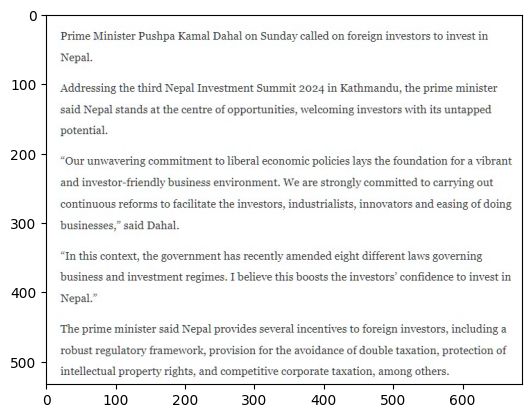

In [65]:
plt.imshow(img)

In [66]:
# set padding size
padding_size = 140 

# padd with black pixels
padded_image = np.zeros((img.shape[0] + 2 * padding_size, img.shape[1] + 2 * padding_size, 3), dtype=np.uint8)
padded_image[padding_size:padding_size + img.shape[0], padding_size:padding_size + img.shape[1]] = img

rotated_img = rotate_image_with_padding(padded_image,10)

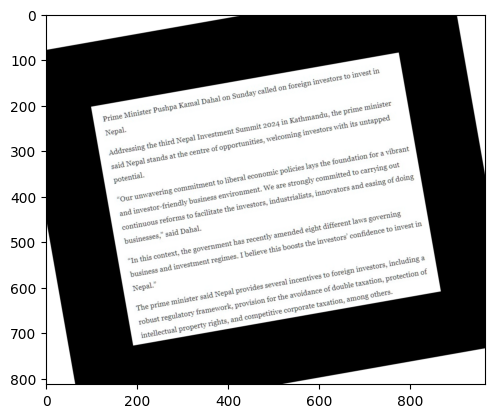

In [67]:
plt.imshow(rotated_img)

# Tesseract OCR

In [68]:
# text_blur   = pytesseract.image_to_data(gray_blur,lang = 'eng', config = custom_config,output_type=Output.DICT)['text']
text = pytesseract.image_to_string(rotated_img,lang = 'eng', config = custom_config)
print(text)

mes:

<tment 18

;on, protecio”




# Paddle OCR

In [71]:
ocr = PaddleOCR(use_angle_cls=True, lang='en')

[2024/09/15 08:56:34] ppocr DEBUG: Namespace(alpha=1.0, alphacolor=(255, 255, 255), benchmark=False, beta=1.0, binarize=False, cls_batch_num=6, cls_image_shape='3, 48, 192', cls_model_dir='C:\\Users\\Ghost/.paddleocr/whl\\cls\\ch_ppocr_mobile_v2.0_cls_infer', cls_thresh=0.9, cpu_threads=10, crop_res_save_dir='./output', det=True, det_algorithm='DB', det_box_type='quad', det_db_box_thresh=0.6, det_db_score_mode='fast', det_db_thresh=0.3, det_db_unclip_ratio=1.5, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_east_score_thresh=0.8, det_limit_side_len=960, det_limit_type='max', det_model_dir='C:\\Users\\Ghost/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, det_pse_thresh=0, det_sast_nms_thresh=0.2, det_sast_score_thresh=0.5, draw_img_save_dir='./inference_results', drop_score=0.5, e2e_algorithm='PGNet', e2e_char_dict_path='./ppocr/utils/ic15_dict.txt', e2e_limit_side_len=768, e2e_limit_type='max', e2e_model_dir=None,

In [72]:
result = ocr.ocr(rotated_img, cls=True)
text = '\n'.join([word[1][0] for line in result for word in line])
print(text)

[2024/09/15 08:56:37] ppocr DEBUG: dt_boxes num : 15, elapsed : 0.20499825477600098
[2024/09/15 08:56:37] ppocr DEBUG: cls num  : 15, elapsed : 0.16351652145385742
[2024/09/15 08:56:40] ppocr DEBUG: rec_res num  : 15, elapsed : 3.0239994525909424
Prime Minister Pushpa Kamal Dahal on Sunday called on foreign investors to invest in
Nepal.
Addressing the third Nepal Investment Summit 2024 in Kathmandu, the prime minister
said Nepal stands at the centre of opportunities, welcoming investors with its untapped
potential.
"Our unwavering commitment to liberal economic policies lays the foundation for a vibrant
and investor-friendly business environment. We are strongly committed to carrying out
continuous reforms to facilitate the investors,industrialists, innovators and easing of doing
businesses, said Dahal.
"In this context, the government has recently amended eight different laws governing
business and investment regimes.I believe this boosts the investors'confidence to invest in
Nepal."
